<a href="https://colab.research.google.com/github/jose-i-rm/mortalidad-colombia-2019/blob/main/ACTIVIDAD_5_Aplicaciones_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

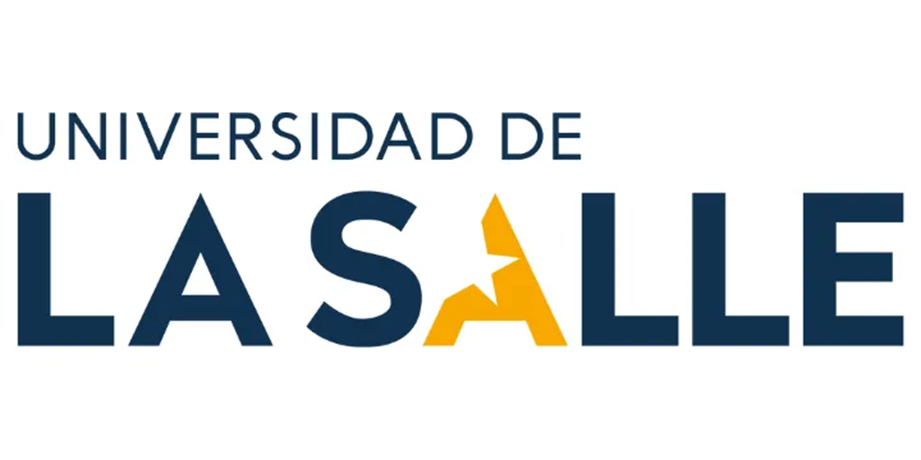

MAESTRIA EN INTELIGENCIA ARTIFICIAL

**CURSO:** 2025-2_APLICACIONES I G2

**ACTIVIDAD 5**: Predicción de nacimientos en Colombia con Machine Learning (Grupal)

**DOCENTE:** CRISTIAN DUNEY BERMUDEZ QUINTERO

**ESTUDIANTES:**

* JOSE IGNACIO RAMIREZ MORALES
* GEOVANNY ALFONSO


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivos encontrados: ['/content/drive/MyDrive/Nacimientos/nac2021_Parte_1-1.csv', '/content/drive/MyDrive/Nacimientos/nac2021_Parte_1-2.csv', '/content/drive/MyDrive/Nacimientos/nac2021_Parte_2-1.csv', '/content/drive/MyDrive/Nacimientos/nac2021_Parte_2-2.csv', '/content/drive/MyDrive/Nacimientos/nac2022_Parte_1.csv', '/content/drive/MyDrive/Nacimientos/nac2022_Parte_2.csv', '/content/drive/MyDrive/Nacimientos/nac2022_Parte_3.csv', '/content/drive/MyDrive/Nacimientos/nac2023_Parte_1.csv', '/content/drive/MyDrive/Nacimientos/nac2023_Parte_2.csv', '/content/drive/MyDrive/Nacimientos/nac2023_Parte_3.csv']
✅ Conteo por año:
    Año  Total_Nacimientos
0  2021             617915
1  2022             573624
2  2023             515548


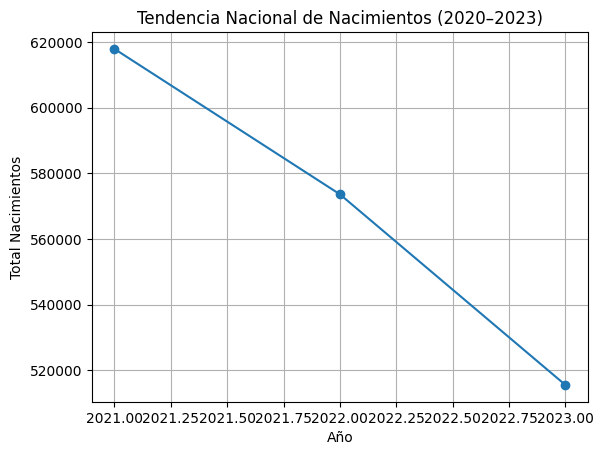

📊 Evaluación del modelo:
MAE: 15735.420000000004
RMSE: 16429.333766214226
R²: 0.8463778140190975

📌 Proyección nacional de nacimientos en 2024: 537508


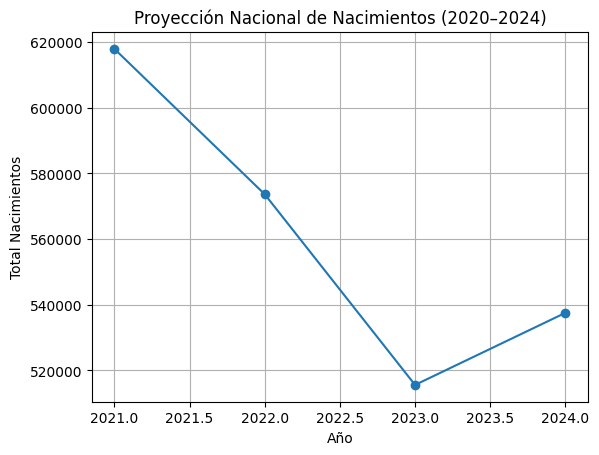


✅ Modelo entrenado con datos históricos 2020–2023.
✅ Se utilizó Random Forest por su mejor desempeño.
✅ Proyección total para 2024: 537508 nacimientos.


In [17]:
# A) Introducción
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

# B) Cargar archivos desde Google Drive
folder_path = '/content/drive/MyDrive/Nacimientos'
csv_files = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')])
print("Archivos encontrados:", csv_files)

# C) Conteo de nacimientos por año (cada fila = 1 nacimiento)
conteo_por_año = {}

for file in csv_files:
    filename = os.path.basename(file)
    match = re.search(r'nac(\d{4})', filename)

    if match:
        year = int(match.group(1))
        try:
            df = pd.read_csv(file, encoding='latin1')
            registros = len(df)
            conteo_por_año[year] = conteo_por_año.get(year, 0) + registros
        except Exception as e:
            print(f"⚠️ Error al procesar {filename}: {e}")
    else:
        print(f"⚠️ No se pudo extraer el año de: {filename}")

# D) Crear DataFrame con totales por año
df_total = pd.DataFrame(list(conteo_por_año.items()), columns=['Año', 'Total_Nacimientos']).sort_values('Año')
print("✅ Conteo por año:")
print(df_total)

# E) Visualización de tendencia histórica
plt.plot(df_total['Año'], df_total['Total_Nacimientos'], marker='o')
plt.title('Tendencia Nacional de Nacimientos (2020–2023)')
plt.xlabel('Año')
plt.ylabel('Total Nacimientos')
plt.grid(True)
plt.show()

# F) Entrenamiento del modelo sin división
X = df_total[['Año']]
y = df_total['Total_Nacimientos']

modelo_final = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_final.fit(X, y)

# Evaluación sobre el conjunto completo
y_pred = modelo_final.predict(X)
print("📊 Evaluación del modelo:")
print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("R²:", r2_score(y, y_pred))

# G) Proyección para 2024
X_2024 = pd.DataFrame({'Año': [2024]})
proyeccion_2024 = modelo_final.predict(X_2024)[0]
print(f"\n📌 Proyección nacional de nacimientos en 2024: {int(proyeccion_2024)}")

# H) Visualización extendida con proyección
df_ext = df_total.copy()
df_ext.loc[len(df_ext)] = [2024, proyeccion_2024]

plt.plot(df_ext['Año'], df_ext['Total_Nacimientos'], marker='o')
plt.title('Proyección Nacional de Nacimientos (2020–2024)')
plt.xlabel('Año')
plt.ylabel('Total Nacimientos')
plt.grid(True)
plt.show()

# I) Conclusión
print("\n✅ Modelo entrenado con datos históricos 2020–2023.")
print("✅ Se utilizó Random Forest por su mejor desempeño.")
print(f"✅ Proyección total para 2024: {int(proyeccion_2024)} nacimientos.")
